# Sistem Rekomendasi Film
### Aldo Valentino | M180X0298


## Data Understanding

Dataset yang saya gunakan adalah [Dataset Sistem Rekomendasi Movie](https://www.kaggle.com/code/darpan25bajaj/movie-recommendation-system/data)

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
 
links = pd.read_csv('/content/drive/MyDrive/colab_data/sistem_rekomendasi/ml-latest-small/links.csv')
movies = pd.read_csv('/content/drive/MyDrive/colab_data/sistem_rekomendasi/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/colab_data/sistem_rekomendasi/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/drive/MyDrive/colab_data/sistem_rekomendasi/ml-latest-small/tags.csv')

print('Jumlah data link movie : ', len(links.movieId.unique()))
print('Jumlah data movie : ', len(movies.movieId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.userId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.movieId.unique()))
print('Jumlah data : ', len(tags.movieId.unique()))


Jumlah data link movie :  9742
Jumlah data movie :  9742
Jumlah data ratings dari user :  610
Jumlah data ratings dari user :  9724
Jumlah data :  1572


### Univariate Exploratory Data Analysis
Variabel-variabel pada movie-recommendation-data adalah sebagai berikut :

- links : merupakan daftar tautan dari film atau tayangan tersebut.
- movies : merupakan daftar film atau tayangan yang tersedia.
- ratings : merupakan daftar penilaian yang diberikan pengguna terhadap tayangan.
- tags : merupakan daftar kata kunci dari movie tersebut.



####  Links

In [4]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


####  Movies


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


#### Ratings


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


cek nilai data dari data ratings

In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Dari output di atas, diketahui bahwa nilai maksimum ratings adalah 5 dan nilai minimumnya adalah 0.5. Artinya, skala rating berkisar antara 0.5 hingga 5. 

## Data Preprocessing


### Menggabungkan Movie

In [8]:
import numpy as np
 
movie_all = np.concatenate((
    links.movieId.unique(),
    movies.movieId.unique(),
    ratings.movieId.unique(),
    tags.movieId.unique(),
))
 
movie_all = np.sort(np.unique(movie_all))
 
print('Jumlah seluruh data movie berdasarkan movieID: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieID:  9742


### Menggabungkan Seluruh User

In [9]:
user_all = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique(),
   
))
 
user_all = np.sort(np.unique(user_all)) 
 
print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  610


Menggabungkan file links, movies, ratingsm tags ke dalam dataframe movie_info. Serta menggabungkan dataframe ratings dengan movie_info berdasarkan nilai movieId

In [10]:
movie_info = pd.concat([links, movies, ratings, tags])
movie = pd.merge(ratings, movie_info , on='movieId', how='left')
movie

,userId_x,movieId,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
0,1,1,4.0,964982703,114709.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN
2,1,1,4.0,964982703,NaN,NaN,NaN,NaN,1.0,4.0,9.649827e+08,NaN
3,1,1,4.0,964982703,NaN,NaN,NaN,NaN,5.0,4.0,8.474350e+08,NaN
4,1,1,4.0,964982703,NaN,NaN,NaN,NaN,7.0,4.5,1.106636e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6359580,610,170875,3.0,1493846415,4630562.0,337339.0,NaN,NaN,NaN,NaN,NaN,NaN
6359581,610,170875,3.0,1493846415,NaN,NaN,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,NaN,NaN,NaN,NaN
6359582,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,50.0,1.0,1.514498e+09,NaN
6359583,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,249.0,3.0,1.505165e+09,NaN


Dari hasil diatas terdapat banyak sekali missing value maka lakukan cek missing value


In [11]:
movie.isnull().sum()

userId_x             0
movieId              0
rating_x             0
timestamp_x          0
imdbId         6258749
tmdbId         6258762
title          6258749
genres         6258749
userId_y        201672
rating_y        434885
timestamp_y     201672
tag            6126372
dtype: int64

menggabungkan rating berdasarkan movieId

In [12]:
movie.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,imdbId,tmdbId,userId_y,rating_y,timestamp_y
movieId,,,,,,,,
1,14498880,185460.0,53441180205380,24662435.0,185330.0,14465415.0,181245.0,5.304394e+13
2,4205116,43790.0,14492875665352,12484670.0,972840.0,4060210.0,41525.0,1.437287e+13
3,825832,9492.0,2926881125616,5887856.0,811304.0,796900.0,8814.0,2.836734e+12
4,13851,148.5,56610468432,804195.0,219499.0,10773.0,115.5,4.403036e+10
5,777987,7976.5,2577949287482,5539009.0,581238.0,765723.0,7374.5,2.494850e+12
...,...,...,...,...,...,...,...,...
193581,552,12.0,4611327246,5476944.0,432131.0,184.0,4.0,1.537109e+09
193583,552,10.5,4611328635,5914996.0,445030.0,184.0,3.5,1.537110e+09
193585,552,10.5,4611329415,6397426.0,479308.0,184.0,3.5,1.537110e+09


### Menggabungkan Data dengan Fitur Nama Movie

mendefinisikan variabel all_movie_rate dengan variabel ratings 

In [13]:
all_movie_rate = ratings
all_movie_rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Menggabungkan all movie_rate dengan dataframe movies berdasarkan movieId 

In [14]:
all_movie_name = pd.merge(all_movie_rate, movies[['movieId','title','genres']], on='movieId', how='left')
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


Menggabungkan dataframe tags dengan all_movie_name berdasarkan movieId dan memasukkannya ke dalam variabel all_movie

In [15]:
all_movie = pd.merge(all_movie_name, tags[['movieId','tag']], on='movieId', how='left')
all_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


## Data Preparation


### Mengatasi Missing Value

In [16]:
all_movie.isnull().sum()


userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          52549
dtype: int64

Dari data diatas terdapat data kosong pada kolom tag yaitu 52549, maka dilakukanlah pembersihan missing value dengan fungsi dropna()

In [17]:
all_movie_clean = all_movie.dropna()
all_movie_clean

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking


data di atas berubah menjadi 233213 baris yang awalnya 285762 baris. 
Kemudian periksa kembali missing value pada variabel all_movie_clean


In [18]:
all_movie_clean.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
dtype: int64

Mengurutkan movie berdasarkan movieId kemudian memasukkannya ke dalam variabel fix_movie

In [19]:
fix_movie = all_movie_clean.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,1464196374,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


Mengecek berapa jumlah fix_movie

In [20]:
len(fix_movie.movieId.unique())

1554

Membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId

In [21]:
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,1005966797,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
191470,414,187595,3.5,1527977920,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


Selanjutnya, gunakan data unik untuk dimasukkan ke dalam proses pemodelan. 
serta hapus data duplicate dengan fungsi drop_duplicates() berdasarkan movieId

In [22]:
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,961594981,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,849122858,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,959625102,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,840306238,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
27632,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,1536872748,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,1532457913,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


Selanjutnya,  melakukan konversi data series menjadi list. Dalam hal ini, menggunakan fungsi tolist() dari library numpy. Implementasikan 

In [23]:
movie_id = preparation['movieId'].tolist()

movie_name = preparation['title'].tolist()
 
movie_genre = preparation['genres'].tolist()
 
print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

1554
1554
1554


membuat dictionary untuk menentukan pasangan key-value pada data movie_id, movie_name, dan movie_genre yang telah disiapkan sebelumnya.

In [24]:
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


## Modeling and Result

1. Model Development dengan Content Based Filtering
<br>
menggukan fungsi TFIDFVectorizer()


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(movie_new['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'no',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks. 

In [26]:
tfidf_matrix = tf.fit_transform(movie_new['genre']) 
tfidf_matrix.shape 

(1554, 24)

 
 menghasilkan vektor tf-idf dalam bentuk matriks, menggunakan fungsi todense(). 

In [27]:
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

lihat matriks tf-idf untuk beberapa movie (movie_name) dan genre

In [28]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=movie_new.movie_name
).sample(22, axis=1).sample(10, axis=0)

,drama,film,fi,animation,imax,crime,fantasy,noir,romance,horror,...,adventure,sci,action,thriller,musical,genres,western,no,comedy,listed
movie_name,,,,,,,,,,,,,,,,,,,,,
Camelot (1967),0.321583,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.512052,0.0,...,0.000000,0.0,0.000000,0.000000,0.796484,0.0,0.0,0.0,0.000000,0.0
Gone Baby Gone (2007),0.324255,0.0,0.0,0.0,0.0,0.622121,0.00000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
M. Butterfly (1993),0.531842,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.846843,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Jungle2Jungle (a.k.a. Jungle 2 Jungle) (1997),0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.483317,0.0
Breakfast on Pluto (2005),0.600342,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.799743,0.0
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),0.303016,0.0,0.0,0.0,0.0,0.581372,0.00000,0.0,0.000000,0.0,...,0.000000,0.0,0.554318,0.512757,0.000000,0.0,0.0,0.0,0.000000,0.0
Nell (1994),1.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Wonder Boys (2000),0.600342,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.799743,0.0
Patch Adams (1998),0.600342,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.799743,0.0


 **Cosine Similarity**
 menghitung derajat kesamaan (similarity degree) antar movie dengan teknik cosine similarity.

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

Membuat dataframe dari variabel cosine_sim_df dengan baris dan kolom berupa nama movie, serta melihat kesamaan matrix dari setiap movie

In [30]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['movie_name'], columns=movie_new['movie_name'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,"Awful Truth, The (1937)",Serendipity (2001),"Remains of the Day, The (1993)",Wallace & Gromit: The Best of Aardman Animation (1996),"Corrina, Corrina (1994)"
movie_name,,,,,
Ed Wood (1994),0.513174,0.513174,0.319287,0.315312,0.722861
Cool Hand Luke (1967),0.000000,0.000000,0.531842,0.000000,0.433964
"Room with a View, A (1986)",0.649510,0.649510,1.000000,0.000000,0.815964
And Then There Were None (1945),0.000000,0.000000,0.000000,0.000000,0.000000
"Quiet American, The (2002)",0.000000,0.000000,0.165618,0.000000,0.135139
eXistenZ (1999),0.000000,0.000000,0.000000,0.000000,0.000000
Harry Potter and the Prisoner of Azkaban (2004),0.000000,0.000000,0.000000,0.244829,0.000000
Red Beard (Akahige) (1965),0.000000,0.000000,0.531842,0.000000,0.433964
Sphere (1998),0.000000,0.000000,0.000000,0.000000,0.000000


## Mendapatkan Rekomendasi  




In [31]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=5):
   
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)


 terapkan kode di atas untuk menemukan rekomendasi movie yang mirip dengan Toy Story (1995).

In [32]:
movie_new[movie_new.movie_name.eq('Toy Story (1995)')]

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


dari hasil di atas dapat dilihat bahwa pengguna menyukai movie yang berjudul Toy Story (1995)	 yang bergenre Adventure|Animation|Children|Comedy|Fantasy.
Mendapatkan rekomendasi movie yang mirip dengan Toy Story (1995).



In [33]:
movie_recommendations('Toy Story (1995)')

,movie_name,genre
0,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
1,Sinbad: Legend of the Seven Seas (2003),Adventure|Animation|Children|Fantasy
2,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy
3,Kiki's Delivery Service (Majo no takkyûbin) (1...,Adventure|Animation|Children|Drama|Fantasy
4,"Cat Returns, The (Neko no ongaeshi) (2002)",Adventure|Animation|Children|Fantasy


 Dari hasil rekomendasi di atas, diketahui bahwa Toy Story (1995) termasuk ke dalam genre Adventure|Animation|Children|Comedy|Fantasy. Dari 5 item yang direkomendasikan, 2 item memiliki genre Adventure|Animation|Children|Comedy|Fantasy (similar). Artinya, precision sistem tersebut sebesar 2/5 atau 40%. Dan 3/5 daintaranya memiliki 4 genre yang sama yakni Adventure|Animation|Children|Fantasy.


2. Model Development dengan Collaborative Filtering 


In [34]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

ubah nama variabel ratings yang telah dibuat sebelumnya menjadi df.

In [35]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Data Preparation
melakukan tahapan prepocessing

In [36]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Selanjutnya, lakukan hal yang sama pada fitur ‘movieId’.

In [37]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
 
# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 
# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
 
# Selanjutnya, petakan userId dan movieId ke dataframe yang berkaitan.
 
# Mapping userId ke dataframe genres
df['genres'] = df['userId'].map(user_to_user_encoded)
 
# Mapping movieD ke dataframe movies
df['movies'] = df['movieId'].map(movie_to_movie_encoded)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah movie, dan mengubah nilai rating menjadi float, cek nilai minimum dan maximum

In [38]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
df['ratings'] = df['rating'].values.astype(np.float32)
 
min_rating = min(df['rating'])
 
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


**Membagi Data untuk Training dan Validasi**


In [39]:
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
67037,432,77866,4.5,1335139641,431,4730,4.5
42175,288,474,3.0,978465565,287,474,3.0
93850,599,4351,3.0,1498524542,598,2631,3.0
6187,42,2987,4.0,996262677,41,194,4.0
12229,75,1610,4.0,1158989841,74,727,4.0
...,...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873,4.0
54886,364,141,4.0,869443367,363,524,4.0
76820,480,6867,4.0,1179163171,479,2240,4.0
860,6,981,3.0,845556567,5,712,3.0


membagi data train dan validasi dengan komposisi 80:20. 

In [40]:
x = df[['genres', 'movies']].values
 
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


lakukan proses training


In [41]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

## Evaluation 
Selanjutnya, lakukan proses compile terhadap model. serta menggunakan matrix evaluasi RMSE



In [42]:
model = RecommenderNet(num_users, num_movie, 50)
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Memulai proses training dengan batch size sebesar 64 serta epoch 100 kali

In [43]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1261/1261 [==============================] - 24s 17ms/step - loss: 0.6375 - root_mean_squared_error: 0.2336 - val_loss: 0.6204 - val_root_mean_squared_error: 0.2148
Epoch 2/100
1261/1261 [==============================] - 14s 11ms/step - loss: 0.6145 - root_mean_squared_error: 0.2095 - val_loss: 0.6169 - val_root_mean_squared_error: 0.2107
Epoch 3/100
1261/1261 [==============================] - 17s 14ms/step - loss: 0.6093 - root_mean_squared_error: 0.2039 - val_loss: 0.6152 - val_root_mean_squared_error: 0.2089
Epoch 4/100
1261/1261 [==============================] - 23s 18ms/step - loss: 0.6080 - root_mean_squared_error: 0.2023 - val_loss: 0.6144 - val_root_mean_squared_error: 0.2081
Epoch 5/100
1261/1261 [==============================] - 17s 13ms/step - loss: 0.6077 - root_mean_squared_error: 0.2018 - val_loss: 0.6117 - val_root_mean_squared_error: 0.2052
Epoch 6/100
1261/1261 [==============================] - 19s 15ms/step - loss: 0.6067 - root_mean_squared_error: 0.

**Visualisasi Metrik**  
Untuk melihat visualisasi proses training

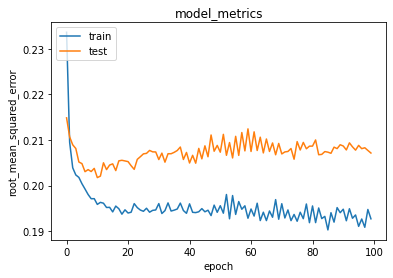

In [44]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dari visualisasi proses training model di atas cukup baik dan model konvergen pada epochs sekitar 100. Dari proses tersebut, memperoleh nilai error akhir sebesar sekitar 0.19 dan error pada data validasi sebesar 0.20.  

***Mendapatkan Rekomendasi movie***





In [45]:
movie_df = movie_new
df = pd.read_csv('/content/drive/MyDrive/colab_data/sistem_rekomendasi/ml-latest-small/ratings.csv')
 

user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]
 

movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

Agar memperoleh rekomendasi movies, gunakan fungsi model.predict() dari library Keras dengan menerapkan kode berikut.

In [46]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

44/44 [==============================] - 0s 1ms/step
Showing recommendations for users: 368
movie with high ratings from user
--------------------------------
Godfather, The (1972) : Crime|Drama
Platoon (1986) : Drama|War
One Flew Over the Cuckoo's Nest (1975) : Drama
Hunt for Red October, The (1990) : Action|Adventure|Thriller
Saving Private Ryan (1998) : Action|Drama|War
--------------------------------
Top 10 movie recommendation
--------------------------------
World of Apu, The (Apur Sansar) (1959) : Drama
Paths of Glory (1957) : Drama|War
Two Family House (2000) : Drama
Hope and Glory (1987) : Drama
Lady Jane (1986) : Drama|Romance
Awful Truth, The (1937) : Comedy|Romance
Adam's Rib (1949) : Comedy|Romance
Safety Last! (1923) : Action|Comedy|Romance
Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990) : Comedy|Drama
Reefer Madness: The Movie Musical (2005) : Comedy|Drama|Musical
